# SCRAP VS PRODUCTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed


In [3]:
df = pd.read_csv("data.csv")
df.head()

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2021-12-01,Mañana,B,EB G1,0,0,0.000,0.00,1,Wednesday
1,2021-12-01,Mañana,B,EB G2,"IBT24,5X35C0F0S",4,64.550,86.25,1,Wednesday
2,2021-12-01,Mañana,B,EB G3,IBT17X40G1F0SO,8,194.770,12.40,1,Wednesday
3,2021-12-01,Mañana,B,EB G4,IBT17X30G1F0S2,8,295.776,11.85,1,Wednesday
4,2021-12-01,Mañana,B,EB-17,0,0,0.000,0.00,1,Wednesday


In [4]:
df_A=df.groupby("MÁQ.").sum()
df_A.head()

,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA
MÁQ.,,,,
EB 120,971,23432.213,1331.60,861
EB 121,148,54850.490,6826.78,817
EB G1,469,9404.216,769.75,903
EB G2,498,9999.206,1896.40,939
EB G3,144,5954.846,950.83,792


In [5]:
df_A['SCRAP']/(df_A['SCRAP']+df_A['TOTAL KG'])*100

MÁQ.
EB 120     5.377201
EB 121    11.068551
EB G1      7.565879
EB G2     15.942021
EB G3     13.768819
            ...    
EB-123     9.474548
EB-124     5.775423
EB-125     5.731245
EB-17     11.041784
EB-18     12.652941
Length: 62, dtype: float64

In [6]:
df_A['PORCENTAJE'] = df_A['SCRAP']/(df_A['SCRAP']+df_A['TOTAL KG'])*100
df_A.head()

,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,PORCENTAJE
MÁQ.,,,,,
EB 120,971,23432.213,1331.60,861,5.377201
EB 121,148,54850.490,6826.78,817,11.068551
EB G1,469,9404.216,769.75,903,7.565879
EB G2,498,9999.206,1896.40,939,15.942021
EB G3,144,5954.846,950.83,792,13.768819


In [7]:
df_A.sort_values(by = ["PORCENTAJE"],ascending = False, inplace = True)
df_A

,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,PORCENTAJE
MÁQ.,,,,,
EB-106,226,2835.249,738.85,813,20.672343
EB G2,498,9999.206,1896.40,939,15.942021
EB-108,289,3259.290,587.25,798,15.266967
EB-070,271,3931.508,664.80,792,14.463783
EB-101,261,3342.117,547.36,807,14.072843
...,...,...,...,...,...
EB-095,0,0.000,0.00,792,NaN
EB-096,0,0.000,0.00,792,NaN
EB-097,0,0.000,0.00,792,NaN


In [8]:
df_A.head(15)

,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,PORCENTAJE
MÁQ.,,,,,
EB-106,226,2835.249,738.85,813,20.672343
EB G2,498,9999.206,1896.40,939,15.942021
EB-108,289,3259.290,587.25,798,15.266967
EB-070,271,3931.508,664.80,792,14.463783
EB-101,261,3342.117,547.36,807,14.072843
EB G3,144,5954.846,950.83,792,13.768819
EB-115,145,3698.485,587.05,792,13.698406
EB-18,305,6577.465,952.80,803,12.652941
EB 121,148,54850.490,6826.78,817,11.068551


* Making a bar chart

In [9]:
df_A.index[0:15]

Index(['EB-106', 'EB G2', 'EB-108', 'EB-070', 'EB-101', 'EB G3', 'EB-115',
       'EB-18', 'EB 121', 'EB-17', 'EB-029', 'EB-099', 'EB-075', 'EB-123',
       'EB-045'],
      dtype='object', name='MÁQ.')

In [10]:
list_A = df_A.index[0:15]

In [11]:
df_A['PORCENTAJE'].head(15)

MÁQ.
EB-106    20.672343
EB G2     15.942021
EB-108    15.266967
EB-070    14.463783
EB-101    14.072843
EB G3     13.768819
EB-115    13.698406
EB-18     12.652941
EB 121    11.068551
EB-17     11.041784
EB-029    10.668124
EB-099    10.467013
EB-075     9.847659
EB-123     9.474548
EB-045     8.258189
Name: PORCENTAJE, dtype: float64

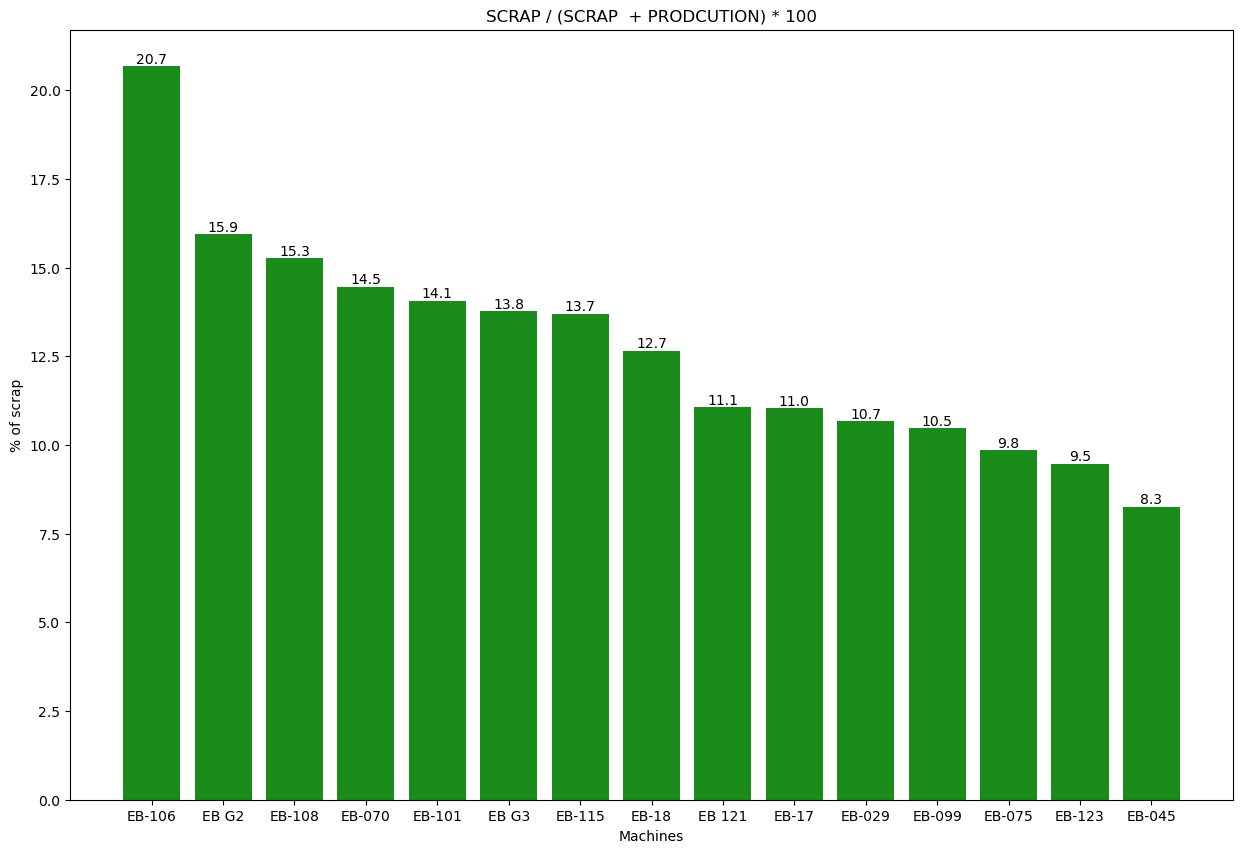

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize = [15,10])

x_pos = list_A
y_pos = df_A['PORCENTAJE'].head(15)

bars = ax.bar(x_pos, y_pos,color = 'green', alpha = 0.9,linewidth = 0)
ax.set_xlabel('Machines')
ax.set_ylabel('% of scrap')
ax.set_title('SCRAP / (SCRAP  + PRODCUTION) * 100')

ax.bar_label(bars, label_type = "edge", fmt='%0.1f')

#plt.show()
plt.savefig('scrap_vs_production.pdf')

# SCRAP TENDENCY PER MACHINE

In [13]:
df

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2021-12-01,Mañana,B,EB G1,0,0,0.000,0.00,1,Wednesday
1,2021-12-01,Mañana,B,EB G2,"IBT24,5X35C0F0S",4,64.550,86.25,1,Wednesday
2,2021-12-01,Mañana,B,EB G3,IBT17X40G1F0SO,8,194.770,12.40,1,Wednesday
3,2021-12-01,Mañana,B,EB G4,IBT17X30G1F0S2,8,295.776,11.85,1,Wednesday
4,2021-12-01,Mañana,B,EB-17,0,0,0.000,0.00,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...
4318,2021-12-23,Noche,A,EB 121,0,0,0.000,0.00,23,Thursday
4319,2021-12-23,Noche,A,EB-122,IPT18X40C0F0SO,12,169.230,24.90,23,Thursday
4320,2021-12-23,Noche,A,EB-123,0,0,0.000,0.00,23,Thursday
4321,2021-12-23,Noche,A,EB-124,0,0,0.000,0.00,23,Thursday


In [14]:
df_C = df.groupby(['DIA','MÁQ.']).sum()
df_C

PRODUCCION (PZAS)  TOTAL KG   SCRAP
DIA MÁQ.                                       
1   EB 120                 48  1151.520   32.90
    EB 121                  0     0.000    0.00
    EB G1                   0     0.000    0.00
    EB G2                  19   298.675  129.25
    EB G3                  24   578.010   38.90
...                       ...       ...     ...
23  EB-123                  0     0.000    0.00
    EB-124                  0     0.000    0.00
    EB-125                 35  1095.500   53.85
    EB-17                 134  2583.360  203.85
    EB-18                   0     0.000    0.00

[1426 rows x 3 columns]

In [15]:
df_C.index

MultiIndex([( 1, 'EB 120'),
            ( 1, 'EB 121'),
            ( 1,  'EB G1'),
            ( 1,  'EB G2'),
            ( 1,  'EB G3'),
            ( 1,  'EB G4'),
            ( 1, 'EB-026'),
            ( 1, 'EB-029'),
            ( 1, 'EB-032'),
            ( 1, 'EB-036'),
            ...
            (23, 'EB-116'),
            (23, 'EB-117'),
            (23, 'EB-118'),
            (23, 'EB-119'),
            (23, 'EB-122'),
            (23, 'EB-123'),
            (23, 'EB-124'),
            (23, 'EB-125'),
            (23,  'EB-17'),
            (23,  'EB-18')],
           names=['DIA', 'MÁQ.'], length=1426)

Not part of the code

In [16]:
df_C.xs(( 1, 'EB 120'))

PRODUCCION (PZAS)      48.00
TOTAL KG             1151.52
SCRAP                  32.90
Name: (1, EB 120), dtype: float64

In [17]:
df_C.xs(( 1, 'EB 120')).loc['SCRAP']

32.900000000000006

In [18]:
df_C.loc[(1, 'EB 120')].loc['SCRAP']

32.900000000000006

In [19]:
df['DIA'].values

array([ 1,  1,  1, ..., 23, 23, 23], dtype=int64)

In [20]:
type(df['DIA'].values)

numpy.ndarray

Part of the code

In [21]:
days = set(df['DIA'].values)
print(days)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [22]:
days_list = list(days)
print(days_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [23]:
days = days_list[-7:]
print(days)

[17, 18, 19, 20, 21, 22, 23]


In [24]:
print(list_A) # from 'SCRAP / (SCRAP  + PRODCUTION) * 100'

Index(['EB-106', 'EB G2', 'EB-108', 'EB-070', 'EB-101', 'EB G3', 'EB-115',
       'EB-18', 'EB 121', 'EB-17', 'EB-029', 'EB-099', 'EB-075', 'EB-123',
       'EB-045'],
      dtype='object', name='MÁQ.')


In [25]:
# just checking output with one machine
scrap_list = []
values_scrap = {}
for day in days:
    scrap = df_C.loc[(day, 'EB-106')].loc['SCRAP']
    scrap_list.append(scrap)
values_scrap['EB-106'] = scrap_list

print(scrap_list)
print('---------')
print(values_scrap)

[45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2]
---------
{'EB-106': [45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2]}


In [26]:
df_C

PRODUCCION (PZAS)  TOTAL KG   SCRAP
DIA MÁQ.                                       
1   EB 120                 48  1151.520   32.90
    EB 121                  0     0.000    0.00
    EB G1                   0     0.000    0.00
    EB G2                  19   298.675  129.25
    EB G3                  24   578.010   38.90
...                       ...       ...     ...
23  EB-123                  0     0.000    0.00
    EB-124                  0     0.000    0.00
    EB-125                 35  1095.500   53.85
    EB-17                 134  2583.360  203.85
    EB-18                   0     0.000    0.00

[1426 rows x 3 columns]

In [27]:
# 7 last days for 'SCRAP / (SCRAP  + PRODCUTION) * 100'
values_scrap = {}

for machine in list_A:
    scrap_list = []
    for day in days:
        scrap = df_C.loc[(day, machine)].loc['SCRAP']
        scrap_list.append(scrap)
    values_scrap[machine] = scrap_list

print(values_scrap)

{'EB-106': [45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2], 'EB G2': [272.7, 117.2, 58.9, 16.05, 58.9, 0.0, 16.05], 'EB-108': [24.85, 40.55, 0.0, 41.15, 0.0, 71.7, 20.25], 'EB-070': [100.75, 55.85, 25.0, 141.7, 0.0, 0.0, 0.0], 'EB-101': [9.2, 11.25, 15.7, 36.25, 60.3, 0.0, 12.2], 'EB G3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-115': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-18': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB 121': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-17': [0.0, 0.0, 0.0, 94.2, 110.35, 616.5999999999999, 203.85], 'EB-029': [71.7, 13.25, 13.0, 28.450000000000003, 22.4, 74.5, 0.0], 'EB-099': [0.0, 0.0, 0.0, 25.0, 8.1, 0.0, 39.4], 'EB-075': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-123': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-045': [25.4, 15.2, 0.0, 0.0, 0.0, 0.0, 0.0]}


* NOT PART OF THE CODE

In [28]:

y = values_scrap
for y_values in y:
    print(y_values)
    print(y[y_values])

EB-106
[45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2]
EB G2
[272.7, 117.2, 58.9, 16.05, 58.9, 0.0, 16.05]
EB-108
[24.85, 40.55, 0.0, 41.15, 0.0, 71.7, 20.25]
EB-070
[100.75, 55.85, 25.0, 141.7, 0.0, 0.0, 0.0]
EB-101
[9.2, 11.25, 15.7, 36.25, 60.3, 0.0, 12.2]
EB G3
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB-115
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB-18
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB 121
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB-17
[0.0, 0.0, 0.0, 94.2, 110.35, 616.5999999999999, 203.85]
EB-029
[71.7, 13.25, 13.0, 28.450000000000003, 22.4, 74.5, 0.0]
EB-099
[0.0, 0.0, 0.0, 25.0, 8.1, 0.0, 39.4]
EB-075
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB-123
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EB-045
[25.4, 15.2, 0.0, 0.0, 0.0, 0.0, 0.0]


In [29]:
for values in y.items():
    print(values)

('EB-106', [45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2])
('EB G2', [272.7, 117.2, 58.9, 16.05, 58.9, 0.0, 16.05])
('EB-108', [24.85, 40.55, 0.0, 41.15, 0.0, 71.7, 20.25])
('EB-070', [100.75, 55.85, 25.0, 141.7, 0.0, 0.0, 0.0])
('EB-101', [9.2, 11.25, 15.7, 36.25, 60.3, 0.0, 12.2])
('EB G3', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB-115', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB-18', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB 121', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB-17', [0.0, 0.0, 0.0, 94.2, 110.35, 616.5999999999999, 203.85])
('EB-029', [71.7, 13.25, 13.0, 28.450000000000003, 22.4, 74.5, 0.0])
('EB-099', [0.0, 0.0, 0.0, 25.0, 8.1, 0.0, 39.4])
('EB-075', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB-123', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('EB-045', [25.4, 15.2, 0.0, 0.0, 0.0, 0.0, 0.0])


In [30]:
for values in y.keys():
    print(values)

EB-106
EB G2
EB-108
EB-070
EB-101
EB G3
EB-115
EB-18
EB 121
EB-17
EB-029
EB-099
EB-075
EB-123
EB-045


In [31]:
for values in y.values():
    print(values)

[45.25, 23.7, 0.0, 41.1, 82.65, 8.25, 36.2]
[272.7, 117.2, 58.9, 16.05, 58.9, 0.0, 16.05]
[24.85, 40.55, 0.0, 41.15, 0.0, 71.7, 20.25]
[100.75, 55.85, 25.0, 141.7, 0.0, 0.0, 0.0]
[9.2, 11.25, 15.7, 36.25, 60.3, 0.0, 12.2]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 94.2, 110.35, 616.5999999999999, 203.85]
[71.7, 13.25, 13.0, 28.450000000000003, 22.4, 74.5, 0.0]
[0.0, 0.0, 0.0, 25.0, 8.1, 0.0, 39.4]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[25.4, 15.2, 0.0, 0.0, 0.0, 0.0, 0.0]


* PART OF THE CODE

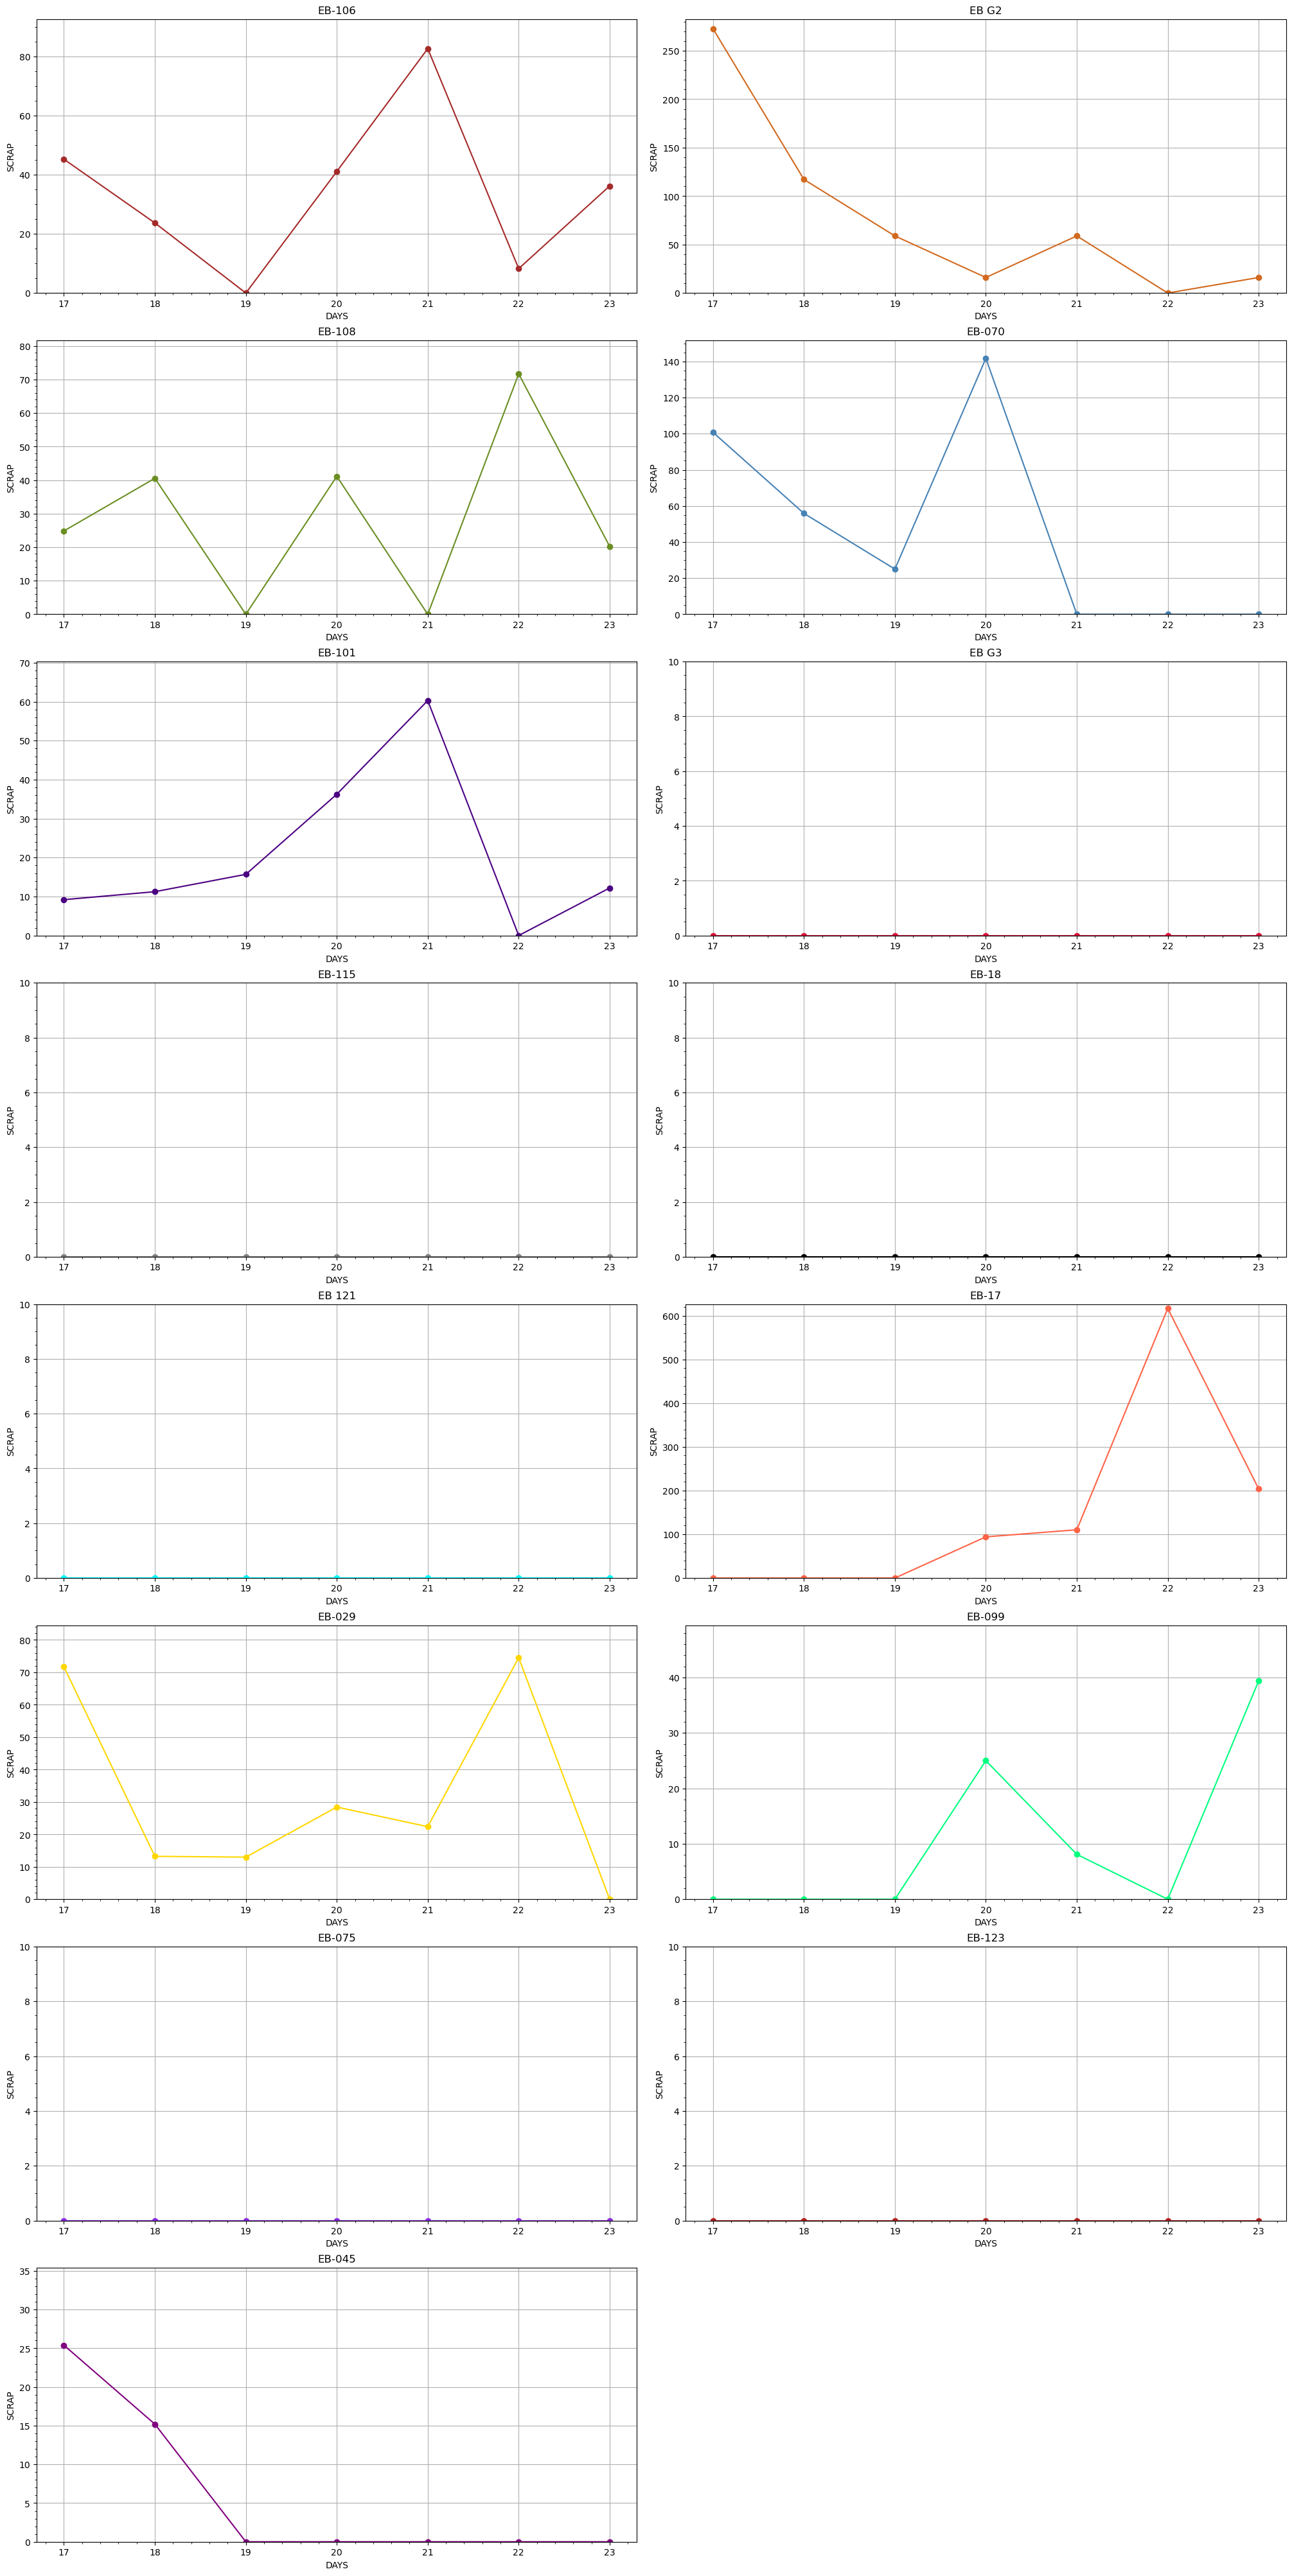

In [32]:
# tendency for 'SCRAP / (SCRAP  + PRODCUTION) * 100'
titles = []
for values in y.keys():
    titles.append(values)

fig_b = plt.figure(figsize=(20, 40), constrained_layout=True)

x = days
y = values_scrap
colors = ['brown','chocolate','olivedrab','steelblue','indigo','crimson','gray','black','cyan','tomato','gold','springgreen',
          'blueviolet','firebrick','purple']
sub = 1
for value in y.values():
    plt.subplot(8,2,sub)
    plt.plot( x , value, 'o',ls = '-', markevery=1,c = colors[sub-1])
    plt.title(titles[sub-1])
    plt.ylabel('SCRAP')
    plt.xlabel('DAYS')
    plt.ylim(0,max(value)+10) # greater value of list
    sub = sub +1
    plt.grid(True)
    plt.minorticks_on()

#plt.show()
plt.savefig('tendency_scrap_vs_production.pdf')

In [33]:
print (x)

[17, 18, 19, 20, 21, 22, 23]


In [34]:
print(value)

[25.4, 15.2, 0.0, 0.0, 0.0, 0.0, 0.0]
